# Train & Analysis of Baseline Model

In [1]:
import autograd.numpy as ag_np

# Use helper packages
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from train_valid_test_loader import load_train_valid_test_datasets

# Some packages you might need (uncomment as necessary)
import pandas as pd
import matplotlib.pyplot as plt

from CollabFilterMeanOnly import CollabFilterMeanOnly

In [2]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
model = CollabFilterMeanOnly(
    n_epochs=10, batch_size=10000, step_size=0.1)
model.init_parameter_dict(n_users, n_items, train_tuple)

# Fit the model with SGD
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     0.00136 | train_MAE     3.53059 | valid_MAE     3.54504 | grad_wrt_mu     0.00070
epoch       0.143 | loss_total     0.00138 | train_MAE     3.53052 | valid_MAE     3.54497 | grad_wrt_mu     0.00071
epoch       0.286 | loss_total     0.00138 | train_MAE     3.53044 | valid_MAE     3.54489 | grad_wrt_mu     0.00071
epoch       0.429 | loss_total     0.00136 | train_MAE     3.53037 | valid_MAE     3.54482 | grad_wrt_mu     0.00070
epoch       0.571 | loss_total     0.00137 | train_MAE     3.53030 | valid_MAE     3.54475 | grad_wrt_mu     0.00070
epoch       0.714 | loss_total     0.00137 | train_MAE     3.53023 | valid_MAE     3.54468 | grad_wrt_mu     0.00071
epoch       0.857 | loss_total     0.00138 | train_MAE     3.53016 | valid_MAE     3.54461 | grad_wrt_mu     0.00071
epoch       1.000 | loss_total     0.00137 | train_MAE     3.53009 | valid_MAE     3.54454 | grad_wrt_mu     0.00071
epoch       1.143 | loss_total     0.00138 | train_MAE     3.530

In [3]:
final_mu = model.param_dict['mu'][0]
print(f"Final mu = {final_mu}")
print(f"Final Train MAE = {model.trace_mae_train[-1]}")
print(f"Final Valid MAE = {model.trace_mae_valid[-1]}")

Final mu = 0.004939411075579074
Final Train MAE = 3.5257168498328473
Final Valid MAE = 3.5401671643701906


In [4]:
test_y = test_tuple[2]
test_yhat = model.predict(test_tuple[0], test_tuple[1], mu=final_mu)
test_mae = ag_np.mean(ag_np.absolute(test_y - test_yhat))
print(f"Final Test MAE = {test_mae}")

Final Test MAE = 3.50126058892442


In [5]:
epochs = ag_np.array(model.trace_epoch)
epochs_of_interest = ag_np.argwhere(epochs >= 2.0)
# epochs[epochs_of_interest]

In [6]:
train_loss = ag_np.array(model.trace_mae_train)[epochs_of_interest]
valid_loss = ag_np.array( model.trace_mae_valid)[epochs_of_interest]

Text(0.5, 1.0, 'Baseline Model Loss over Epochs, Batch Size = 10000')

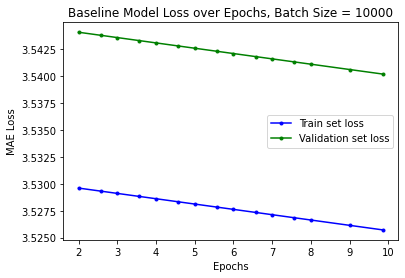

In [7]:
plt.plot( epochs[epochs_of_interest], train_loss, 'b.-', label='Train set loss')
plt.plot( epochs[epochs_of_interest], valid_loss, 'g.-', label='Validation set loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Baseline Model Loss over Epochs, Batch Size = 10000')

## Baseline Model, Batch size = 100

In [8]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
model = CollabFilterMeanOnly(
    n_epochs=10, batch_size=100, step_size=0.1)
model.init_parameter_dict(n_users, n_items, train_tuple)

# Fit the model with SGD
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     0.13410 | train_MAE     3.53059 | valid_MAE     3.54504 | grad_wrt_mu     0.07020
epoch       0.001 | loss_total     0.14179 | train_MAE     3.52357 | valid_MAE     3.53802 | grad_wrt_mu     0.07206
epoch       0.003 | loss_total     0.13929 | train_MAE     3.51636 | valid_MAE     3.53081 | grad_wrt_mu     0.07112
epoch       0.004 | loss_total     0.13290 | train_MAE     3.50925 | valid_MAE     3.52370 | grad_wrt_mu     0.06997
epoch       0.126 | loss_total     0.11098 | train_MAE     2.96272 | valid_MAE     2.97717 | grad_wrt_mu     0.06304
epoch       0.250 | loss_total     0.06947 | train_MAE     2.49219 | valid_MAE     2.50639 | grad_wrt_mu     0.04832
epoch       0.376 | loss_total     0.05197 | train_MAE     2.13846 | valid_MAE     2.15040 | grad_wrt_mu     0.03966
epoch       0.500 | loss_total     0.04482 | train_MAE     1.84826 | valid_MAE     1.85834 | grad_wrt_mu     0.03424
epoch       0.626 | loss_total     0.02922 | train_MAE     1.615

In [9]:
final_mu = model.param_dict['mu'][0]
print(f"Final mu = {final_mu}")
print(f"Final Train MAE = {model.trace_mae_train[-1]}")
print(f"Final Valid MAE = {model.trace_mae_valid[-1]}")

Final mu = 3.5318067618659654
Final Train MAE = 0.9443588094680871
Final Valid MAE = 0.9446140579653872


In [10]:
test_y = test_tuple[2]
test_yhat = model.predict(test_tuple[0], test_tuple[1], mu=final_mu)
test_mae = ag_np.mean(ag_np.absolute(test_y - test_yhat))
print(f"Final Test MAE = {test_mae}")

Final Test MAE = 0.9456300136412301


In [11]:
epochs = ag_np.array(model.trace_epoch)
epochs_of_interest = ag_np.argwhere(epochs >= 2.0)
#epochs[epochs_of_interest]

In [12]:
train_loss = ag_np.array(model.trace_mae_train)[epochs_of_interest]
valid_loss = ag_np.array( model.trace_mae_valid)[epochs_of_interest]

Text(0.5, 1.0, 'Baseline Model Loss over Epochs, Batch Size = 100')

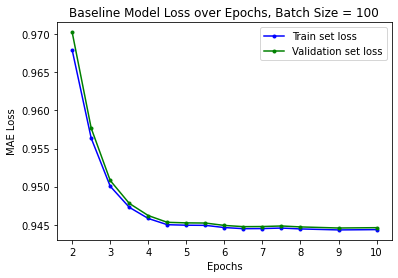

In [13]:
plt.plot( epochs[epochs_of_interest], train_loss, 'b.-', label='Train set loss')
plt.plot( epochs[epochs_of_interest], valid_loss, 'g.-', label='Validation set loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Baseline Model Loss over Epochs, Batch Size = 100')

## Short answer 1b - closed-form operation applied to the training set to compute the optimal mu value

In [14]:
train_y = train_tuple[2]
avg_rating = ag_np.mean(train_y)
avg_rating

3.5305857142857144